# **Python Practical 1**

Candidate No.s: 20010973, 200001408 <br>
Tutor: Ognjen Arandelovic <br>
Date: 06/05/22

In this practical, we were tasked to create a programme which cleaned a dataset, and performed various analysis upon it, before representing the findings sing visualisation via graphs and other means. We believe we have completed this task as we have succesfully implemented all basic requirements, as well as all Easy and all Medium/Medium-Hard requirements. Although we initially attempted the Hard requirements, we were unable to complete them due to the time pressure forced upon us due to out group being down a member and therefore only having 2 people to work on both practicals for this module.

All of the requirements thta we have implemented work as expected, apart from the slight error in the 'apps' section where there are strange characters, however from our research this is how iOS is displayed so this should not prove a problem.

We initially struggled a lot with the networkx graphs, especially with their readability, however overcame this issue, as described below, by reducing the sample size to a manageable number that was easily repeatable.

Our code is extremely reusable for other data following this API's structure, however due to certain aspects of our code being hard-coded the overall reusabillity is relatively low for differently structured CSVs.
Our code is definitiely extremely repeatable due to the consistency of results that occur as long as the CSV has been cleaned (using out python file), of course an outlier in this is when we use sample() as by nature this will return differing results each time.

All of our code apart from the small basic starter template downloaded is our own, however is of course influenced by lecture material and examples.

Imports:

In [1]:
import csv
import pandas as pd
import json
from typing import Counter
import numpy as np
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
import datetime
import re
from bs4 import BeautifulSoup
import networkx as nx
import scipy
from pathlib import Path
# import geopy
# from geopy.geocoders import Nominatim
# from geopy.extra.rate_limiter import RateLimiter
# import folium
# from folium.plugins import FastMarkerCluster, HeatMap

Reading the CSV

In [2]:
df=pd.read_csv("CometLandingCleaned.csv")
df

,Unnamed: 0,rid_str,from_user,text,created_at,time,geo_coordinates,user_lang,in_reply_to_user_id_str,in_reply_to_screen_name,from_user_id_str,in_reply_to_status_id_str,source,profile_image_url,user_followers_count,user_friends_count,status_url,entities_str,hashtags
0,0,5.409304e+17,amika0078788556,RT @VersaTechnology: Congratulations @Philae20...,Fri Dec 05 18:07:14 +0000 2014,2014-12-05 18:07:00,NaN,en,NaN,NaN,1.297570e+09,NaN,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",http://pbs.twimg.com/profile_images/3555068293...,425.0,113.0,http://twitter.com/amika0078788556/statuses/54...,"{""hashtags"":[{""text"":""Philae"",""indices"":[49,56...","{'CometLanding', 'Philae'}"
1,1,5.409300e+17,ChrisDMarshall,CometWatch 2 December Â» Rosetta - ESA's comet...,Fri Dec 05 18:05:46 +0000 2014,2014-12-05 18:05:00,NaN,en,NaN,NaN,4.220121e+07,NaN,"<a href=""https://dev.twitter.com/docs/tfw"" rel...",http://pbs.twimg.com/profile_images/228087980/...,347.0,1286.0,http://twitter.com/ChrisDMarshall/statuses/540...,"{""hashtags"":[{""text"":""CometLanding"",""indices"":...","{'CometLanding', 'lander', 'CometWatch', 'navc..."
2,2,5.409300e+17,MHuuskoL,RT @EUCouncil: After the #CometLanding - Astro...,Fri Dec 05 18:05:36 +0000 2014,2014-12-05 18:05:00,NaN,en,NaN,NaN,5.744348e+08,NaN,"<a href=""http://twitter.com/#!/download/ipad"" ...",http://pbs.twimg.com/profile_images/4973510588...,215.0,310.0,http://twitter.com/MHuuskoL/statuses/540929998...,"{""hashtags"":[{""text"":""CometLanding"",""indices"":...",{'CometLanding'}
3,3,5.409293e+17,SaraGomezAranci,RT @EUCouncil: After the #CometLanding - Astro...,Fri Dec 05 18:03:00 +0000 2014,2014-12-05 18:03:00,NaN,fr,NaN,NaN,1.057356e+09,NaN,"<a href=""http://twitter.com/download/iphone"" r...",http://pbs.twimg.com/profile_images/5391705804...,741.0,310.0,http://twitter.com/SaraGomezAranci/statuses/54...,"{""hashtags"":[{""text"":""CometLanding"",""indices"":...",{'CometLanding'}
4,4,5.409292e+17,CBCDay6,RT @shaunmajumder: Feels good to be the @CBCDa...,Fri Dec 05 18:02:32 +0000 2014,2014-12-05 18:02:00,NaN,en,NaN,NaN,1.772769e+08,NaN,"<a href=""http://twitter.com/download/android"" ...",http://pbs.twimg.com/profile_images/4590694303...,4331.0,2098.0,http://twitter.com/CBCDay6/statuses/5409292290...,"{""hashtags"":[{""text"":""MiniMansbridge"",""indices...","{'MtRushmore', 'MiniMansbridge', 'CometLanding..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77302,77314,5.324601e+17,ABForScience,This means that the actual landing will be ar...,Wed Nov 12 09:09:26 +0000 2014,2014-11-12 09:09:00,NaN,en,NaN,NaN,2.333123e+09,NaN,"<a href=""http://www.tweetcaster.com"" rel=""nofo...",http://pbs.twimg.com/profile_images/4320695593...,155.0,212.0,http://twitter.com/ABForScience/statuses/53246...,"{""hashtags"":[{""text"":""CometLanding"",""indices"":...",{'CometLanding'}
77303,77315,5.324601e+17,atieyK,RT @ObservingSpace: Weâ€™ve been waiting 10 ye...,Wed Nov 12 09:09:26 +0000 2014,2014-11-12 09:09:00,NaN,en,NaN,NaN,5.830372e+07,NaN,"<a href=""https://twitter.com/download/android""...",http://pbs.twimg.com/profile_images/5057311637...,354.0,1088.0,http://twitter.com/atieyK/statuses/53246014845...,"{""hashtags"":[{""text"":""cometlanding"",""indices"":...",{'cometlanding'}
77304,77316,5.324601e+17,j0nny5,RT @maxplanckpress: Accomazzo (flight director...,Wed Nov 12 09:09:26 +0000 2014,2014-11-12 09:09:00,NaN,en,NaN,NaN,1.791486e+07,NaN,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",http://pbs.twimg.com/profile_images/89991673/j...,92.0,63.0,http://twitter.com/j0nny5/statuses/53246014825...,"{""hashtags"":[{""text"":""CometLanding"",""indices"":...",{'CometLanding'}
77305,77317,5.324601e+17,nsentse,7 hours of waiting #CometLanding,Wed Nov 12 09:09:26 +0000 2014,2014-11-12 09:09:00,NaN,en,NaN,NaN,2.043400e+07,NaN,"<a href=""http://twitter.com/download/iphone"" r...",http://pbs.twimg.com/profile_images/3693655850...,200.0,267.0,http://twitter.com/nsentse/statuses/5324601

Total number of tweets, retweets and replies:

In [3]:
len(df)

77307

Number of retweets:

In [4]:
tweets = df['text'] # Gets a series of text content from the tweets
retweets = []
for i in tweets:
    # Iterates through the text
    if (i.startswith('RT @')):
        #If a tweet begins with 'RT @' it is treated as a retweet and therefore adfded to list of retweets
        retweets.append(i)
#retweets will now cotain every retweet
retweets_num = len(retweets) # = number of retweets
retweets_num

59959

Number of replies:

In [5]:
replies = df[df['in_reply_to_user_id_str'].isna() != True] # Finds all tweets where 'user replied to' isn't null
replies_num = len(replies) # = number of replies
replies_num

1724

Number of tweets:

In [6]:
tweets_num = len(tweets) - (len(retweets) + len(replies)) #total no of tweets - retweets and replies
tweets_num # remaining number will be tweets that aren't retweets or replies

15624

Number of Unique Users:

In [7]:
users = df['from_user']
user_set = set() # Since users will appear multiple times, use a set to avoid duplicates
#Add all users to set
for i in users:
    user_set.add(i)
users_num = len(user_set) # = number of unique users
users_num

50220

Average number of replies, retweets and tweets per user:

In [8]:
#Calculating averages
avgReplies = replies_num / users_num
avgRetweets = retweets_num / users_num
avgTweets = tweets_num / users_num

print('Average number of replies per user: ', replies_num / users_num,'replies') 
print('Average number of retweets per user: ', retweets_num / users_num,'retweets')
print('Average number of tweets per user: ', tweets_num / users_num,'tweets')

Average number of replies per user:  0.0343289526085225 replies
Average number of retweets per user:  1.1939267224213461 retweets
Average number of tweets per user:  0.3111111111111111 tweets


Graph of the above results: <br>
We decided a bar graph was the ideal way to display this data, which shows the difference in the average number of times a user send a reply/retweet/tweet.

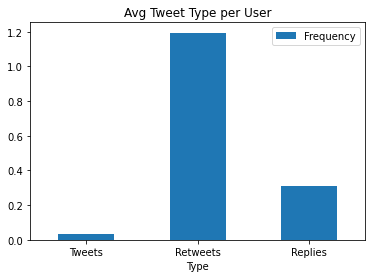

In [9]:
df = pd.DataFrame({'Type':['Tweets','Retweets','Replies'], 'Frequency':[avgReplies, avgRetweets, avgTweets]})
ax = df.plot.bar(x='Type', y='Frequency', rot=0, title='Avg Tweet Type per User')
plt.savefig('averagetweetTypePerUser.png', format="PNG",dpi=300)
plt.show()

Average number of times each retweeted user is being retweeted:

In [10]:
retweeter_set = set() # Since users will appear multiple times, use a set to avoid duplicates
for i in tweets: 
    if (i.startswith('RT @')):
        # If a tweet begins with 'RT @' it is treated as a retweet and therefore 
        tweet = re.split("\s", i) # Splits tweet into a list of words
        retweeter_set.add(tweet[1]) # Adds username (second word) to set
retweeted_avg = retweets_num / len(retweeter_set) 
retweeted_avg

12.390783219673486

Average number of times each user that is replied to is being replied to:

In [11]:
replied_set = set() # Since users will appear multiple times, use a set to avoid duplicates
for i in replies['in_reply_to_user_id_str']:
    replied_set.add(i) # Adds reply to set
replied_avg = replies_num / len(replied_set)
replied_avg

2.1576971214017524

WordCloud / Pie Chart data Set up:

In [12]:
df = pd.read_csv("CometLanding.csv")
df.drop_duplicates(inplace=True)
df = df[df['source'].isna() != True]
entities = df['entities_str']
i=0
hashtags = [None] * df.shape[0]
for x in entities:
    res = json.loads(x)
    hashtags[i] = set(map(lambda x: x['text'], res['hashtags']))
    i += 1

df['hashtags'] = hashtags

hashtags = df['hashtags']
wordlist = []
for x in hashtags:
    while len(x) > 0:
        wordlist.append(x.pop())
        
        
freqs = Counter(wordlist) #Gets a series of the hashtags, paired with their occurances

# Gets the 10 most common hashtag (k/v pairs)
topHashtags = freqs.most_common(10) # (Will be used for the pie chart)

keys = []
for k in topHashtags:
    # Adds each of the keys of the top hashtags to a new list
    keys.append(k[0])
    
bottomHashtags = freqs
# removes the top 10 hashtags for the word list
for x in range(10):
    del bottomHashtags[keys[x]]

Pie Chart of top 10 most common hashtags <br>
We used matplotlib's .pie() function to create this from the extracted top hashtags from the Counter of all hashtags and their occurances.


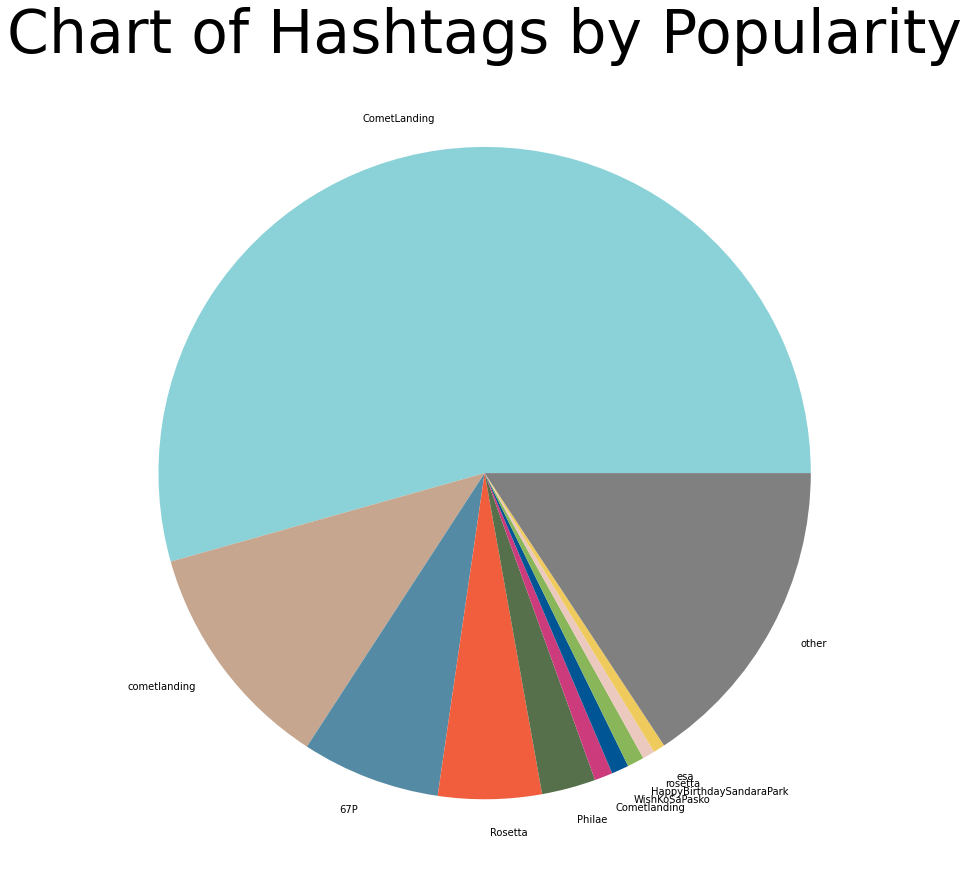

In [13]:
labels = []
for l in topHashtags:
    labels.append(l[0])
labels
vals = []
for v in topHashtags:
    vals.append(v[1])

other = 0 #The no. of occurances of every other hashtag combined
    
for i in list(bottomHashtags.values()):
    # Sum every other value
    other += i

labels.append('other')
vals.append(other)

colours = ['#8AD2D8','#C6A68E','#558AA4','#F15E3D','#56704B','#CC3B7C','#005595','#89B658','#EBC9BE','#EFCB5E','grey']

plt.figure(figsize=(15,15))
plt.title('Chart of Hashtags by Popularity', fontsize=60)
plt.pie(vals, labels = labels, colors = colours)

plt.savefig('mostPopularHashtags.png', format="PNG",dpi=300)
plt.show()

Word Cloud of hashtags with 10 most popular removed:
Our original word cloud only removed the top hashtag, however after removing the top 10 we produced the picture below which we thought was much more readible as there is less of a steep drop in occurances.

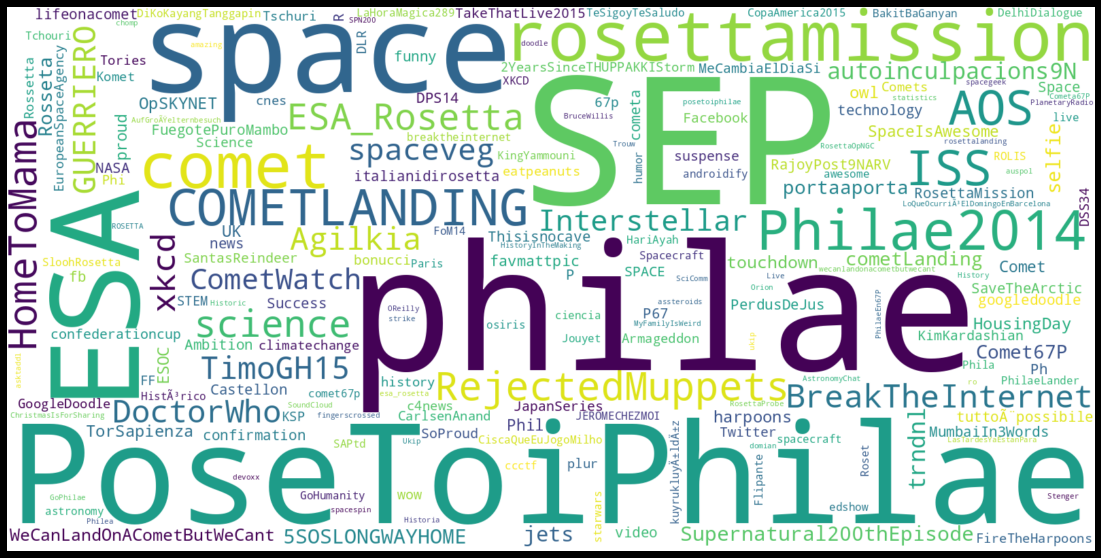

In [14]:
wordcloud = WordCloud(width=1600, height=800,
                          collocations = False,
                          background_color="white").generate_from_frequencies(bottomHashtags)
plt.figure(figsize=(20,10), facecolor="k")
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()
wordcloud.to_file('wordcloud.png')

Structure of datasets:
As expected the number of retweets containing the hashtag is much larger than the number of replies or tweets, as illustrated in the below bar graph, which we need to set 'rot=0' to ensure the x labels were displayed in the correct manner.

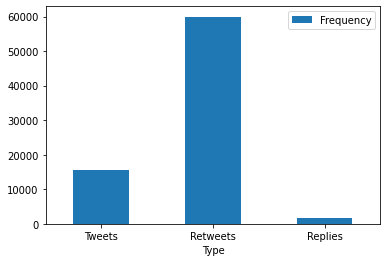

In [15]:
df = pd.DataFrame({'Type':['Tweets','Retweets','Replies'], 'Frequency':[tweets_num,retweets_num,replies_num]})
ax = df.plot.bar(x='Type', y='Frequency', rot=0)
plt.savefig('figure_1.png', format="PNG",dpi=300)

Timeline of tweets activity: <br>
We decided this line graph which shows the number of tweets per minute (the smallest unit of time we allowed to be recorded) would best show the timeline of activity of tweets about the comet.

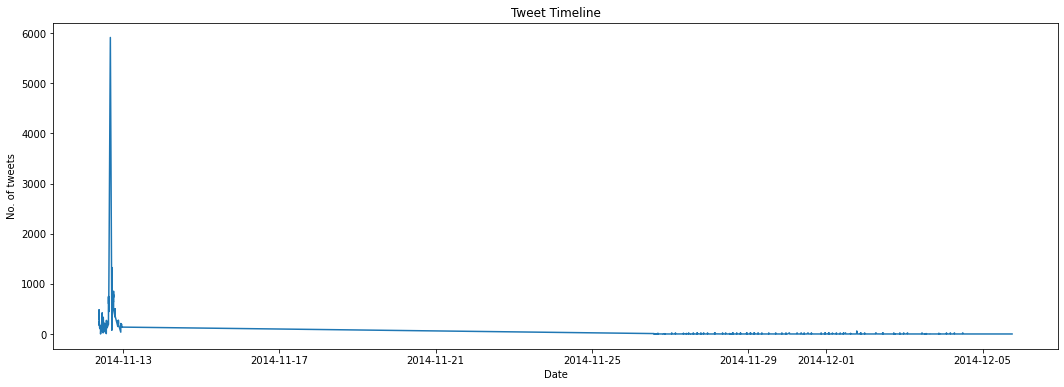

In [16]:
df = pd.read_csv("CometLandingCleaned.csv")
times = pd.to_datetime(df['time'])
x = Counter(times)
dates = list(x.keys())
freqs = list(x.values())
plt.figure(figsize=(18,6))
plt.title("Tweet Timeline")
plt.xlabel("Date")
plt.ylabel("No. of tweets")
plt.plot(dates,freqs)
plt.savefig('tweetTimeline.png')

Applications used to send tweets: <br>
To find this we needed to make use of Beautiful Soup 4 which aids with html parsing as the device was stuck in a < a > tag. This reduced out code length significantly compared to out initial approach which was to use a regex which quickly got out of hand.

In [17]:
srcs = df['source']
apps = [] # List that will contain all applications used to send tweets
for src in srcs:
    #Beautiful soup module used to parse data from the html tag
    soup = BeautifulSoup(src) 
    application = soup.a.string # Gets the content of the <a> tag as a string
    # Removes the 'twitter for' section so it only shows iPad for example
    apps.append(application.replace('Twitter for ','')) 
    
counts = Counter(apps).most_common(10) # Gets 10 most common apps

apps = []
vals = []
for x in counts:
    apps.append(x[0])
    vals.append(x[1])

We decided to only add the top 10 apps, as there were so many different types of app it would be impossible to chart them all, especially as most had only 1 or 2 occurances, matplotlib's .bar() was an easy way to implement this.

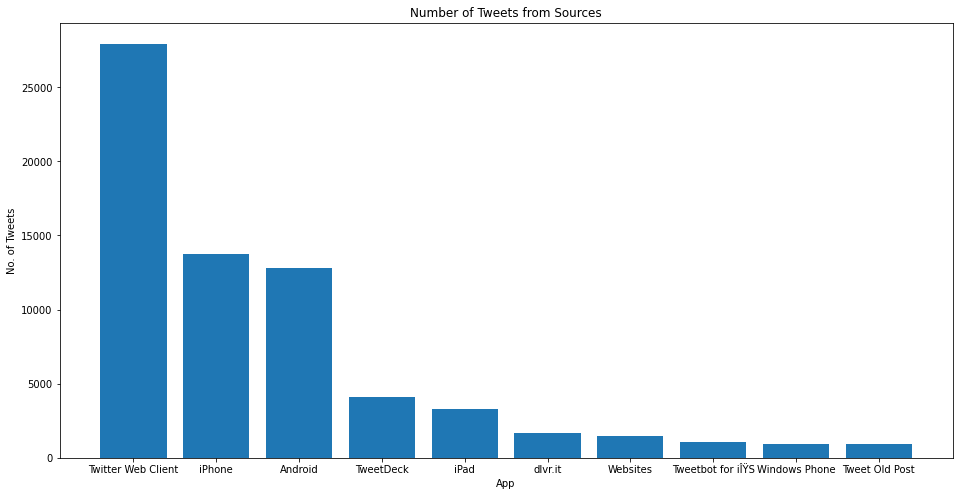

In [18]:
plt.figure(figsize = (16,8))
plt.bar(apps, vals)

plt.xlabel("App")
plt.ylabel("No. of Tweets")
plt.title("Number of Tweets from Sources")
plt.savefig('.png', format="PNG", dpi=1000)
plt.show()

Analyse patterns of user activity over the period covered by the dataset: <br>
For this we decided to produce a graph that we were very interested to see the results in which was a chart showing the most popular time that users sent tweets, and there was a much more drastic difference in the number at day vs night than we expected, especially at 9am.

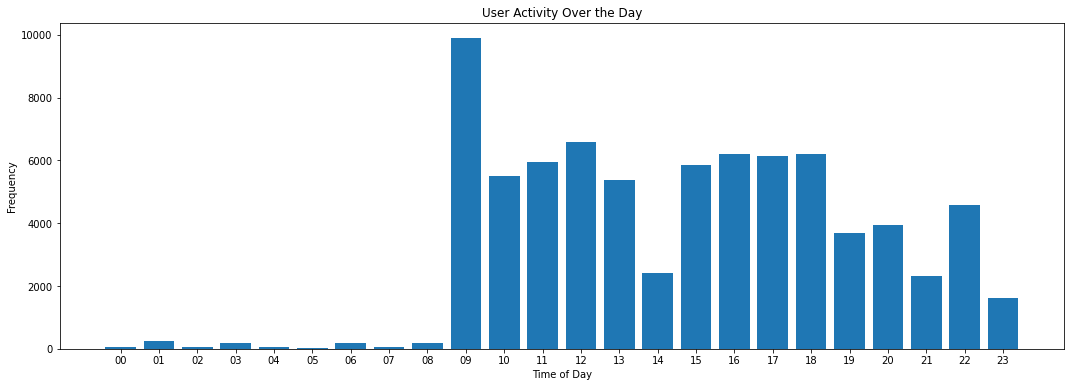

In [19]:
dates = []
formatted_times = pd.to_datetime(df['time'])
for i in formatted_times:
    i = i.strftime('%H')
    dates.append(i)
dates.sort()
count = Counter(dates)
plt.figure(figsize = (18,6))
plt.bar(count.keys(), count.values())
plt.xlabel("Time of Day")
plt.ylabel("Frequency")
plt.title('User Activity Over the Day')
plt.savefig('activityAtTimeHistogram.png', format="PNG", dpi=1000)
plt.show()

Analyse interactions between users: <br>
We decided to represent these on 3 seperate networkx graphs (one each for retweets, replies and mentions), as the combined graph became eligible with any reasonable sample size. For all of the graphs we aimes for the highest dpi we could produce and the smallest node and edge sizes to allow for zooming and reading more details in the clustered sections.

All interactions via replies mapped:

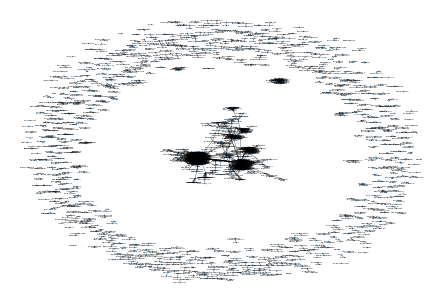

In [20]:
froms = replies['from_user'] # Repliers

tos = replies['in_reply_to_screen_name'] # Original tweeter
G = nx.Graph()
#Draws connections between every user that replies to a nother user and the original tweeter
for f, t in zip(froms, tos):
    G.add_edge(f,t)

nx.draw(G,node_size=0.1, with_labels = True, font_size = 2,width = 0.3)
plt.figure(1, figsize = (500,500))
plt.savefig("replyInteractions.png", format="PNG", dpi=1000)
plt.show()

Sample of 200 retweet interactions mapped:

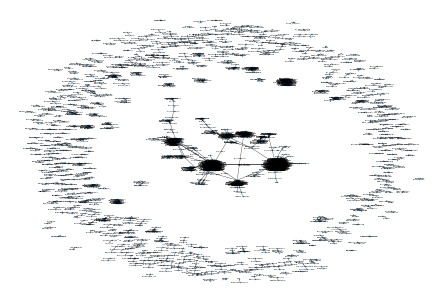

In [21]:
retweets = df[df['text'].str.startswith('RT @')] #Find all retweets
retweets=retweets.sample(2000) #get a random 200 retweets from the list
u1s = retweets['from_user']
text = retweets['text']
u2s = []
G = nx.Graph()
for t in text:
    t = t.split()
    u2s.append(t[1].replace('@','').replace(':',''))

for u1, u2 in zip(u1s, u2s):
        G.add_edge(u1,u2)
nx.draw(G,node_size=0.1, with_labels = True, font_size = 2,width = 0.3)
plt.figure(1, figsize = (500,500))
plt.savefig("retweetInteractions.png", format="PNG", dpi=1000)
plt.show()


We decided to use a sample size of 2000 to create a graph that was still readible and generates relatively quickly, as there were around 50000 total retweets which would take far too long to produce a graph of acceptable resolution.

Sample of 2000 mentions interactions mapped:

/cs/home/gw79/Documents/CS2006/Python1/venv_cs2006/lib64/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 157 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/cs/home/gw79/Documents/CS2006/Python1/venv_cs2006/lib64/python3.6/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 157 missing from current font.
  font.set_text(s, 0, flags=flags)


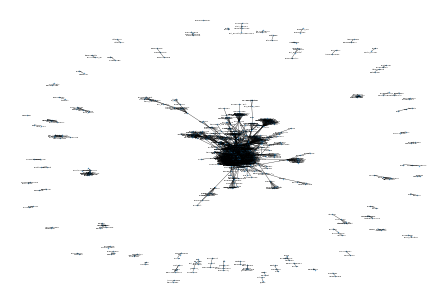

In [22]:
text = df['text'] #Tweet content which will be parsed to find the mentioned user
users = df['from_user']
mentioner = []
mentioned = []
for t,u in zip(text,users):
    # Remove The retweet tag to ensure retweets are not counted as a mention
    # Splits the tweet into a list of strings
    t = t.replace('RT @','').split()
    for i in t:
        #Searches for a mention ('@' followed by a username)
        if i.startswith('@'):
            # Adds the mentioner and mentioned user to appropriate lists
            # Removes '@' sign so it can match expected format
            mentioned.append(i.replace('@',''))
            mentioner.append(u)
            
            
G = nx.Graph()
i = 0
for u1, u2 in zip(mentioner, mentioned):
    # Gets only 2000 mentions
    if i <2000:
        #Adds edges between mentioner and mentioned user
        G.add_edge(u1,u2)
    i+=1
nx.draw(G,node_size=0.1, with_labels = True, font_size = 2,width = 0.3)
plt.figure(1, figsize = (500,500))
plt.savefig("mentionedInteractions.png", format="PNG", dpi=1000)
plt.show()